## Observations and Insights 

Observations:


In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [51]:
# Checking the number of mice.
total_mouses = mouse_df['Mouse ID'].nunique()

# Adding the previous variable into a DataFrame to present the data as requested
total_mouses_df = pd.DataFrame({"Total Mouses": [total_mouses]})

# Display the data
total_mouses_df

Total Mouses
0           249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df[mouse_df.duplicated(['Mouse ID','Timepoint'])]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df[mouse_df['Mouse ID'] == 'g989']

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_df[mouse_df['Mouse ID'] != 'g989']
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [55]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"New Total Mouses": [clean_df['Mouse ID'].nunique()]})

New Total Mouses
0               248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
pd.DataFrame({
    'Mean': group.mean(),
    'Median': group.median(),
    'Variance': group.var(),
    'Standard Deviation': group.std(),
    'SEM': group.sem()
})

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
group.agg(['mean','median','var','std','sem'])

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

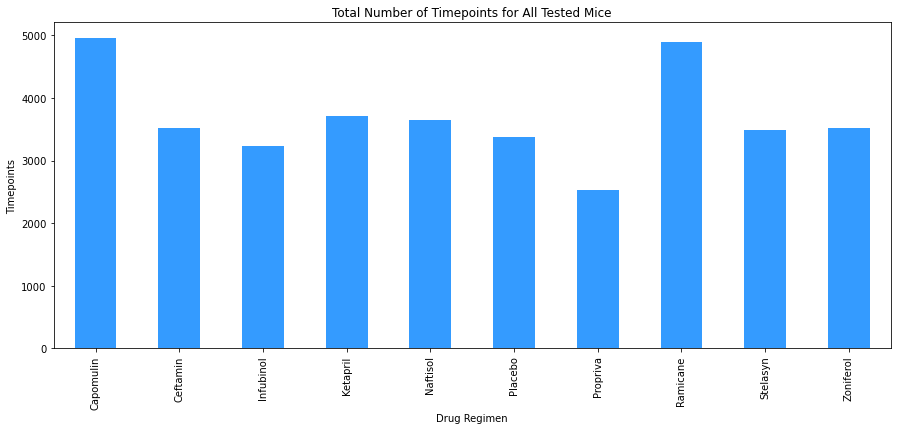

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_plot = clean_df.groupby('Drug Regimen').Timepoint.sum()
clean_plot.plot.bar(color='dodgerblue', alpha=0.9,figsize=(15,6))
plt.title("Total Number of Timepoints for All Tested Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

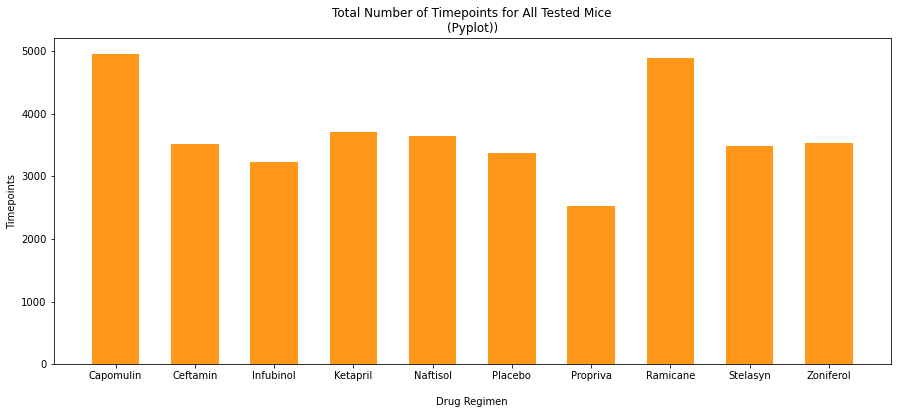

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=[15,6])
plt.bar(clean_plot.index,clean_plot, color='darkorange', alpha=0.9, width=0.6)
plt.title("Total Number of Timepoints for All Tested Mice\n(Pyplot)")
plt.xlabel("\nDrug Regimen")
plt.ylabel("Timepoints")
plt.show()

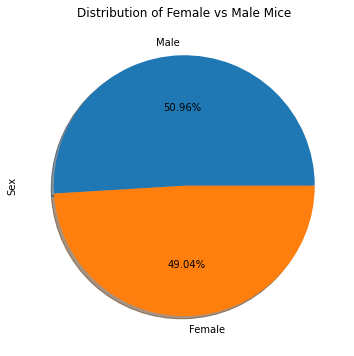

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_df.Sex.value_counts()
pie_data.plot.pie(autopct="%1.2f%%", shadow=True, figsize=(15,6))
plt.title("Distribution of Female vs Male Mice")
plt.show()

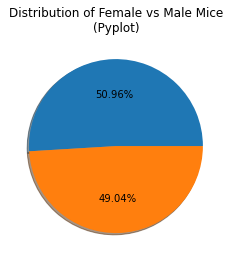

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_data,autopct="%1.2f%%", shadow=True)
plt.title("Distribution of Female vs Male Mice\n(Pyplot)")
plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'Greatest_Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_clean_df = pd.merge(clean_df,greatest_tp, on="Mouse ID")
merge_clean_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  Greatest_Timepoint  
0           45.000000                 0                  45  
1           38.825898                 0                  45  
2           35.014271                 1                  45  
3           34.223992                 1                  45  
4           32.997729                 1                  45

In [164]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]    

drug_val = []

for drug in drugs:
    drug_reg_df = merge_clean_df.loc[merge_clean_df['Drug Regimen'] == drug]
    
    vol_df = drug_reg_df.loc[drug_reg_df['Timepoint'] == drug_reg_df['Greatest_Timepoint']]
    
    values = vol_df['Tumor Volume (mm3)']
    drug_val.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
        
    outliers = (values.loc[(vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (vol_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers}\n')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0



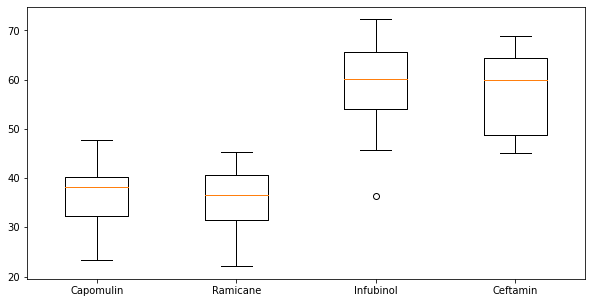

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=[10,5])
plt.boxplot(drug_val, labels=drugs)
plt.show()

## Line and Scatter Plots

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
treat_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_l509 = treat_mouse.loc[treat_mouse["Mouse ID" == "l509"]
mouse_l509
#plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
#plt.title("Capomulin Treatment of Mouse ID # I509")
#plt.xlabel("Timepoint (Days)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_14472/841839685.py, line 4)

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
